## **Introdução a Análise de Agrupamento!**


# Conteúdo:

1.  Pré processamento dos dados: limpeza e trasnformação dos dados.
2.  Análise de agrupamento preliminar: dendogramas e elbow plot

In [1]:
!git clone https://github.com/joaolague/data_mlcourse.git

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append('/content/data_mlcourse')

from plotting_gv import *

In [2]:
data = pd.read_csv('phosphate_assay_sampled_geomet.csv')

In [3]:
data.head(5)

,Name,X,Y,Z,Depth From,Depth To,Length,AL2O3,ALT,BAO,CAO,Consumo_coletor_(g/t),FE2O3,MASSA_T,MGO,NB2O5,P2O5,SIO2,TIO2
0,DH1,2634.56,1816.84,407.75,0.0,5.0,5.0,32.33,ALT1,0.16,0.16,716.00,17.50,13.35,0.10,0.07,1.06,18.65,4.55
1,DH1,2634.56,1816.84,402.75,5.0,10.0,5.0,30.17,ALT1,0.20,0.20,716.00,16.63,13.21,0.11,0.06,1.29,23.69,4.19
2,DH1,2634.56,1816.84,397.75,10.0,15.0,5.0,28.39,ALT1,0.26,0.24,722.50,15.84,13.20,0.12,0.06,1.60,28.66,3.86
3,DH1,2634.56,1816.84,392.75,15.0,20.0,5.0,28.05,ALT1,0.29,0.30,722.50,15.87,13.20,0.13,0.06,1.82,28.62,3.92
4,DH1,2634.56,1816.84,387.75,20.0,25.0,5.0,26.02,ALT1,0.42,0.42,724.75,17.88,13.16,0.17,0.09,2.45,26.02,4.94


In [4]:
data.columns

Index(['Name', 'X', 'Y', 'Z', 'Depth From', 'Depth To', 'Length', 'AL2O3',
       'ALT', 'BAO', 'CAO', 'Consumo_coletor_(g/t)', 'FE2O3', 'MASSA_T', 'MGO',
       'NB2O5', 'P2O5', 'SIO2', 'TIO2'],
      dtype='object')

In [5]:
coords = ['X', 'Y', 'Z']

cat_var = ['ALT']

variables =  ['AL2O3', 'BAO', 'CAO', 'FE2O3', 'MGO', 'NB2O5', 'P2O5', 'SIO2', 'TIO2']

**Pré processamento dos dados: limpeza e tratamento**


In [6]:
print('Counting NaN values for each variable:')
print(data[variables].isnull().sum())

Counting NaN values for each variable:
AL2O3     0
BAO      40
CAO       0
FE2O3     0
MGO       0
NB2O5     0
P2O5      0
SIO2     30
TIO2     20
dtype: int64


In [7]:
print('Full Data statistics:\n')
data[variables].describe().round(2)

Full Data statistics:



,AL2O3,BAO,CAO,FE2O3,MGO,NB2O5,P2O5,SIO2,TIO2
count,3684.00,3644.00,3684.00,3684.00,3684.00,3684.00,3684.00,3654.00,3664.00
mean,11.13,0.41,8.90,24.93,3.53,0.14,4.97,19.90,7.80
std,11.01,0.44,8.74,11.64,3.90,0.10,3.27,8.98,4.81
min,0.01,0.01,0.04,1.55,0.03,0.00,0.24,0.26,0.21
25%,2.58,0.15,0.42,16.41,0.17,0.07,2.63,13.09,4.55
50%,5.57,0.27,8.00,21.17,1.40,0.11,4.20,21.06,6.28
75%,20.51,0.53,17.06,30.09,6.84,0.18,6.65,26.72,9.65
max,38.47,5.38,46.76,84.27,18.49,1.47,22.38,54.03,36.90


In [8]:
data0 = data.dropna(subset=variables)

In [9]:
print('Cleaned Data statistics:\n')
data0[variables].describe().round(2)

Cleaned Data statistics:



,AL2O3,BAO,CAO,FE2O3,MGO,NB2O5,P2O5,SIO2,TIO2
count,3595.00,3595.00,3595.00,3595.00,3595.00,3595.00,3595.00,3595.00,3595.00
mean,11.17,0.41,8.88,24.94,3.53,0.14,4.96,19.88,7.80
std,11.04,0.44,8.74,11.64,3.91,0.10,3.27,8.97,4.81
min,0.01,0.01,0.04,1.55,0.03,0.00,0.24,0.26,0.21
25%,2.59,0.15,0.42,16.40,0.17,0.07,2.63,13.10,4.55
50%,5.58,0.27,7.86,21.19,1.36,0.11,4.19,21.03,6.28
75%,20.76,0.53,17.02,30.09,6.83,0.18,6.65,26.69,9.67
max,38.47,5.38,46.76,84.27,18.49,1.47,22.38,54.03,36.90


**Pré processamento dos dados: transformação dos dados através de padronização**

In [10]:
from sklearn.preprocessing import StandardScaler

x = data0[variables]

x_std = StandardScaler().fit(x).transform(x)

# Análise de agrupamento preliminar: dendograma e elbow plot

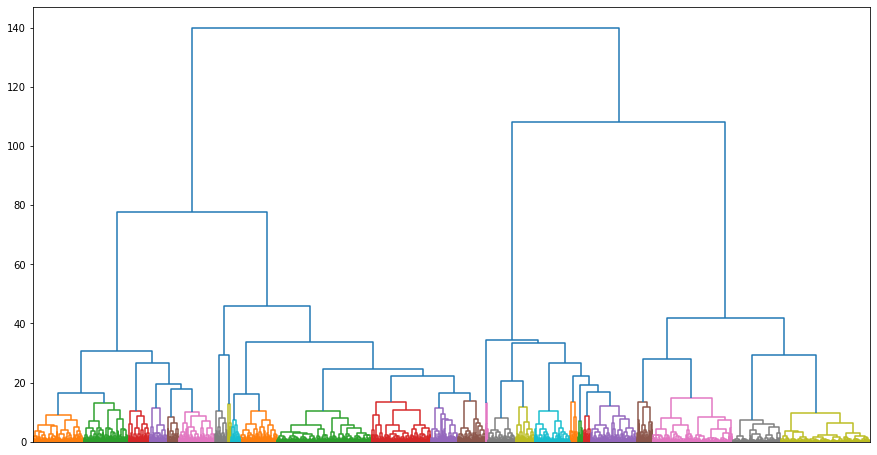

In [11]:
from ml_plotting_gv import dendogram, elbow_plot

dendogram(x_std, method='ward')

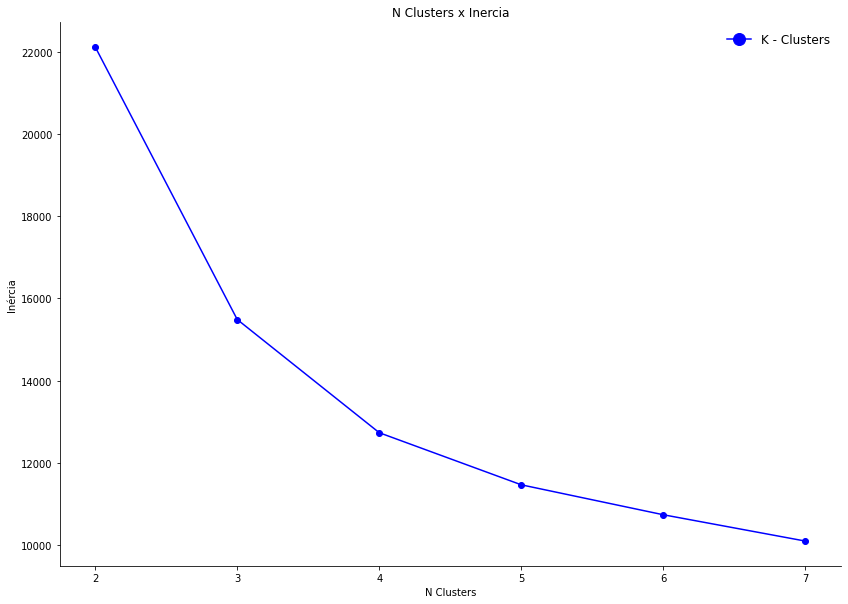

In [12]:
from ml_plotting_gv import elbow_plot

elbow_plot(2, 8, x_std)

## KMeans: executando o algoritmo e entendendo os parâmetros

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters= 5, 
    init='k-means++', 
    n_init=300, 
    random_state=1
)

kmeans.fit(x_std)


data.loc[data0.index, 'kmeans_5k'] = kmeans.labels_


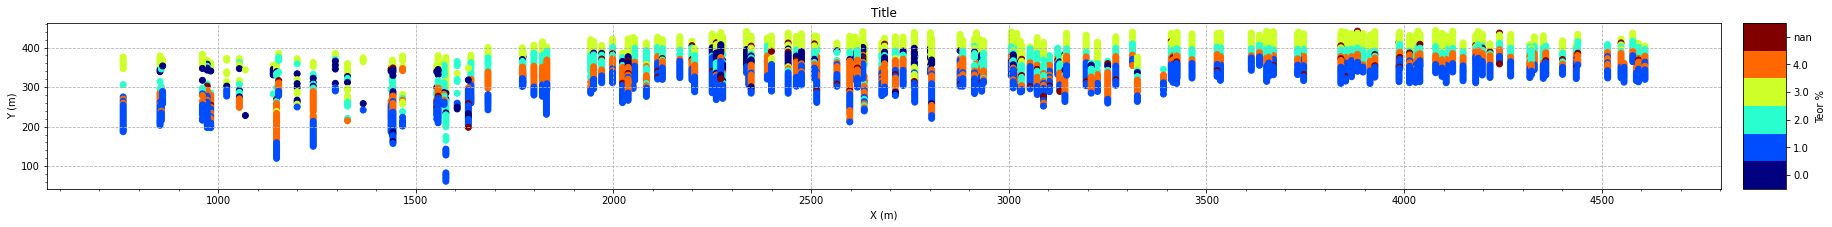

In [24]:
locmap(data['X'], data['Z'], data['kmeans_5k'], cat=True, figsize=(30,10), title='Title')

## Hierarchichal Agglomerative: executando o algoritmo e entendendo os parâmetros

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [15]:
from sklearn.cluster import AgglomerativeClustering


aggl = AgglomerativeClustering(
    n_clusters=5, 
    affinity='euclidean', 
    linkage='ward',
    )


aggl.fit(x_std)  


data.loc[data0.index, 'aggl_5k'] = kmeans.labels_

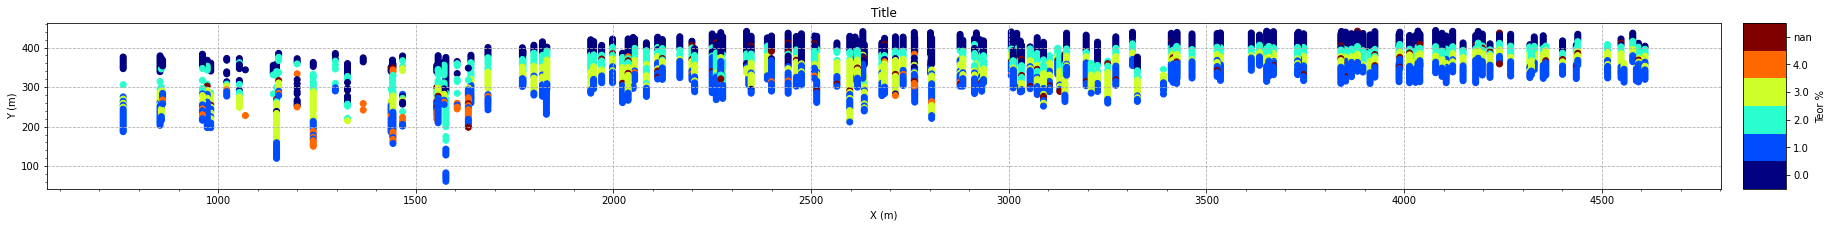

In [23]:
locmap(data['X'], data['Z'], data['aggl_5k'], cat=True, figsize=(30,10), title='Title')

In [17]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

db_km = [] 
sl_km = [] 

sl_ag = []
db_ag = []

h_km = []
h_ag = []

min = 2
max = 7
n_clus = np.arange(min,max,1)


for i in n_clus:

    
    print(f'Executando KMeans para {i}clusters...') 
    cluster = KMeans(n_clusters=i, algorithm='lloyd')
    cluster.fit(x_std) 
    labels_km = cluster.labels_
    data.loc[data0.index, f'kmeans_{i}k'] = labels_km
    sl_km.append(silhouette_score(x_std, labels_km))
    db_km.append(davies_bouldin_score(x_std, labels_km))
    
    
    print(f'Executando Agglomerative para {i}clusters...')
    aggl = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    aggl.fit(x_std)  
    labels_ag = aggl.labels_
    data.loc[data0.index, f'aggl_{i}k'] = labels_ag
    sl_ag.append(silhouette_score(x_std, labels_ag))
    db_ag.append(davies_bouldin_score(x_std, labels_ag))
print('Pronto, os agrupamentos foram calulados e inseridos no seu dataframe e as métricas acumuladas nas listas!')
    

Executando KMeans para 2clusters...
Executando Agglomerative para 2clusters...
Executando KMeans para 3clusters...
Executando Agglomerative para 3clusters...
Executando KMeans para 4clusters...
Executando Agglomerative para 4clusters...
Executando KMeans para 5clusters...
Executando Agglomerative para 5clusters...
Executando KMeans para 6clusters...
Executando Agglomerative para 6clusters...
Pronto, os agrupamentos foram calulados e inseridos no seu dataframe e as métricas acumuladas nas listas!


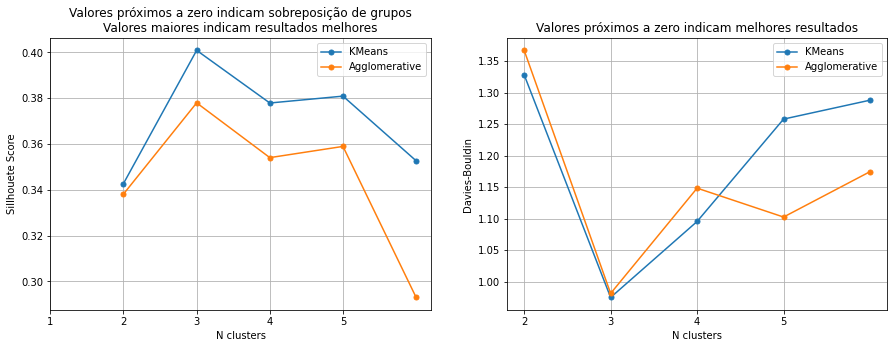

In [18]:
cluster_metrics(n_clus, sl_km, sl_ag, db_km, db_ag)

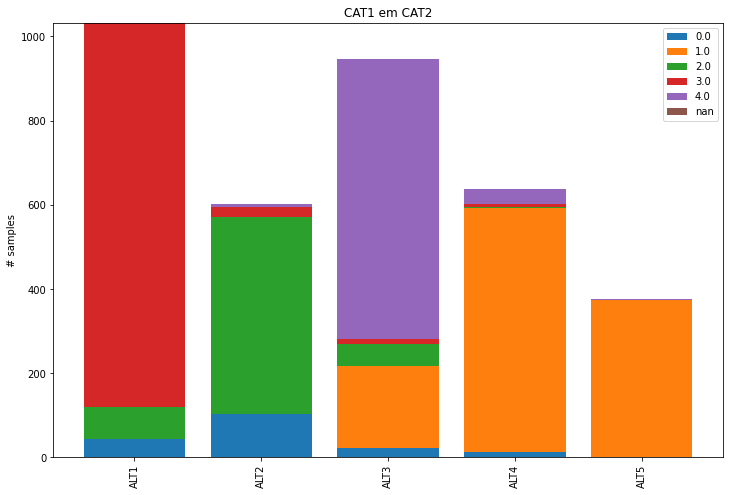

In [19]:
cat1_in_cat2(data['ALT'], data['kmeans_5k'], title="CAT1 em CAT2")

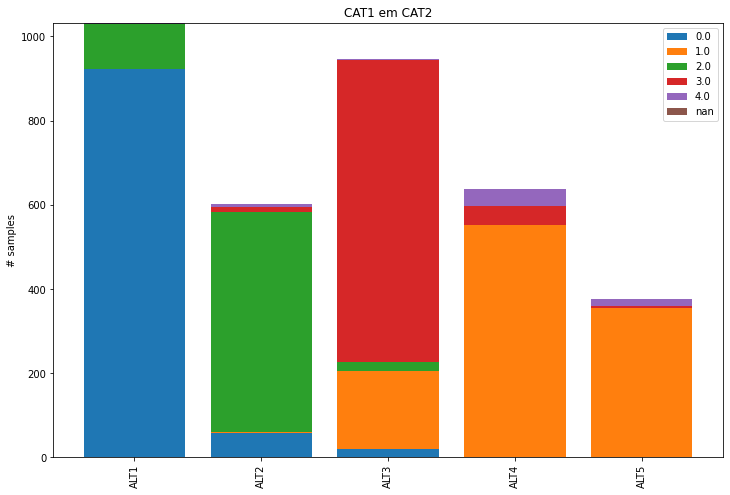

In [20]:
cat1_in_cat2(data['ALT'], data['aggl_5k'], title="CAT1 em CAT2")

Processing AL2O3
Processing BAO
Processing CAO
Processing FE2O3
Processing MGO
Processing NB2O5
Processing P2O5
Processing SIO2
Processing TIO2


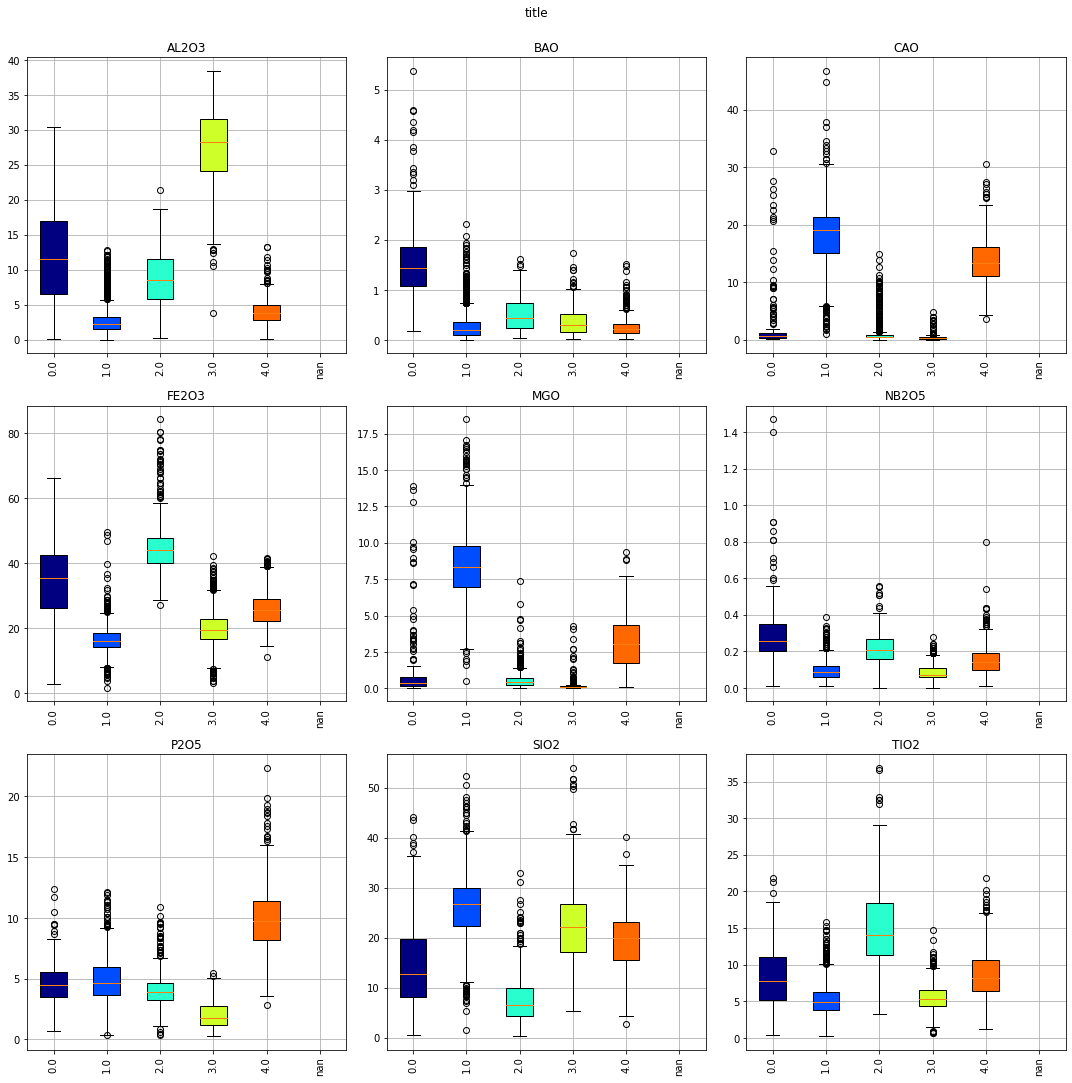

In [21]:
boxplots(data[variables], variables, data['kmeans_5k'], 'title')

In [22]:
path = '/content/drive/MyDrive/GVLA_SHARED FOLDER/02_TRAINING/01_TRAINING_MATERIALS/01_MACHINE_LEARNING/01_SCRIPTS/ML_Práticas_140222/phosphate_assay_sampled_geomet_clustered.csv'

data.to_csv(path, index=False)